## Imports

In [2]:
import csv
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import seaborn as sn
import pandas as pd
from sklearn.model_selection import learning_curve
from sklearn.metrics import *
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from explore_hyperparameter import *
from plot_learning_curve import *

import time
import warnings
warnings.filterwarnings('ignore')


RANDOM_STATE = 4000 #to keep results consistent


## Load Data

In [7]:
data = pd.read_csv('letter-recognition.data')
X = data.values[:, 1:17]
y = data.values[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = RANDOM_STATE)



## NEW ANALYSIS

when max depth is 1, you need a lot of estimators because there is a lot more error. the more estimators, the more those datapoints classified incorrectly are "fixed" by the other estimators

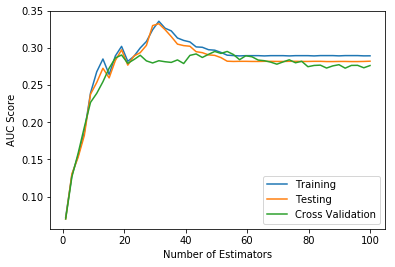

In [3]:
param = np.linspace(1, 100, 50, endpoint=True)
clf = [AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1, random_state=RANDOM_STATE), n_estimators=int(i), random_state=RANDOM_STATE) for i in param]
explore_hyperparameter(X, y, X_train, y_train, X_test, y_test, clf, param, 'Number of Estimators')

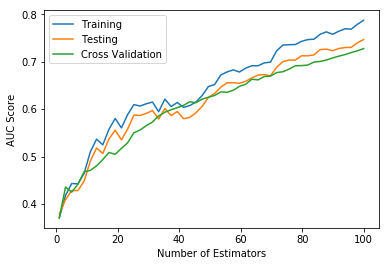

In [9]:
param = np.linspace(1, 100, 50, endpoint=True)
clf = [AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5, random_state=RANDOM_STATE), n_estimators=int(i), random_state=RANDOM_STATE) for i in param]
explore_hyperparameter(X, y, X_train, y_train, X_test, y_test, clf, param, 'Number of Estimators')

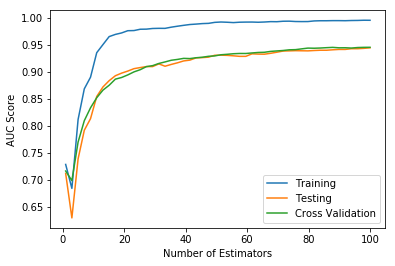

In [8]:
param = np.linspace(1, 100, 50, endpoint=True)
clf = [AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=10, random_state=RANDOM_STATE), n_estimators=int(i), random_state=RANDOM_STATE) for i in param]
explore_hyperparameter(X, y, X_train, y_train, X_test, y_test, clf, param, 'Number of Estimators')

when max depth is 20, one decision tree already gets a pretty high accuracy so the weighted error sampling does not do much, testing AUC oscillates but is pretty much staying the same

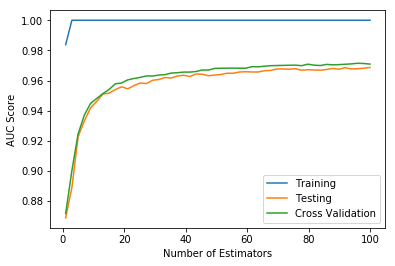

In [4]:
param = np.linspace(1, 100, 50, endpoint=True)
clf = [AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=20, random_state=RANDOM_STATE), n_estimators=int(i), random_state=RANDOM_STATE) for i in param]
explore_hyperparameter(X, y, X_train, y_train, X_test, y_test, clf, param, 'Number of Estimators')

  ## Learning Curve

125.64881014823914


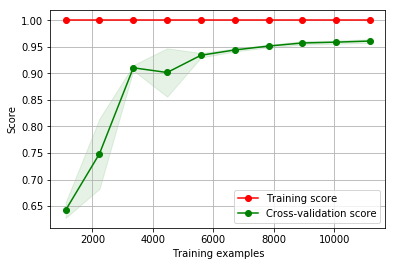

In [10]:
start = time.time()
clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=20, random_state=RANDOM_STATE), n_estimators=60, random_state=RANDOM_STATE)
clf.fit(X_train, y_train)
plot_learning_curve(clf, X_train, y_train, cv=5, train_sizes = np.linspace(0.1, 1, 10))
print(time.time() - start)

# Analyzing time

Text(0.5,0,'Model')

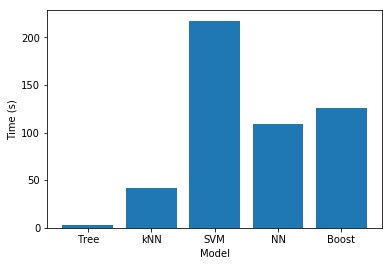

In [3]:
boost = 125.64881014823914
nn = 108.58618187904358
svm = 217.30775094032288
knn = 41.81442093849182
tree = 2.8658857345581055
times = [tree, knn, svm, nn, boost]
names = ['Tree', 'kNN', 'SVM', 'NN', 'Boost']
plt.bar(names, times)
plt.ylabel('Time (s)')
plt.xlabel('Model')

# Analyzing scores

(0.8, 1)

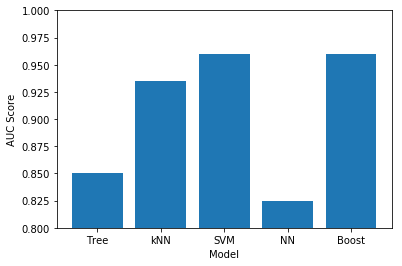

In [7]:
boost = 0.96
nn = 0.825
svm = 0.96
knn = 0.935
tree = 0.85
scores = [tree, knn, svm, nn, boost]
names = ['Tree', 'kNN', 'SVM', 'NN', 'Boost']
plt.bar(names, scores)
plt.ylabel('AUC Score')
plt.xlabel('Model')
axes = plt.gca()
axes.set_ylim([0.8,1])